# Homework 2.2 - Madeline Overton

a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

b) plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 

c) Discuss the complexity of each method.

d) For graduate students who have projects: read the paper, and provide a short summary about your project

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [192]:
# a) Recursion method 

def rec_fib(n): 
    if n == 0: return 0
    elif n == 1: return 1
    else: return rec_fib(n-1) + rec_fib(n-2) 

Text(0, 0.5, 'Calculation Time ( ln(t) )')

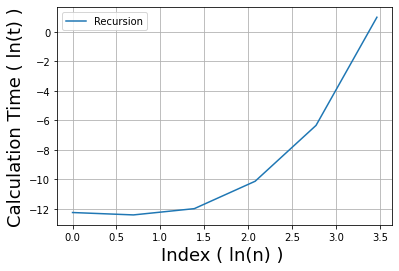

In [193]:
n1=np.array([2**i for i in (np.arange(0, 6))])

time_rec = np.zeros(n1.size)

for i in range(n1.size):
    start_time = time.time()
    fibn = rec_fib(n1[i])
    time_rec[i] = time.time()-start_time
    
plt.plot(np.log(n1), np.log(time_rec), label = 'Recursion')
plt.grid()
plt.legend()
plt.xlabel('Index ( ln(n) ) ', fontsize=18)
plt.ylabel('Calculation Time ( ln(t) )', fontsize=18)

In [194]:
# a) Tabulation method

def tab_fib(n): 
    table =[0]*(n+1)
    table[1] = 1
    
    for i in range(2, n+1): 
        table[i] = table[i-1] + table[i-2] 
        
    return table[n]

Text(0, 0.5, 'Calculation Time ( ln(t) )')

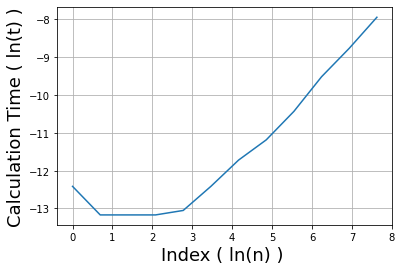

In [195]:
n1=np.array([2**i for i in (np.arange(0, 12))])
time_tab = np.zeros(n1.size)

for i in range(n1.size):
    start_time = time.time()
    fibn = tab_fib(n1[i])
    time_tab[i] = time.time()-start_time
    
plt.plot(np.log(n1), np.log(time_tab), label = 'Tabulation')
plt.grid()
plt.xlabel('Index ( ln(n) ) ', fontsize=18)
plt.ylabel('Calculation Time ( ln(t) )', fontsize=18)

In [196]:
# a) Matrix method 

def arr_pow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
        return
    elif n==1:
        return arr
    
    yarr = arr_pow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
              [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    
    return yarr
    
def mat_fib(n):
    arr = [[1,1], [1,0]]
    fib = arr_pow(arr, n-1)[0][0]
    return fib

In [197]:
mat_fib(30)

832040

Text(0, 0.5, 'Calculation Time ( ln(t) )')

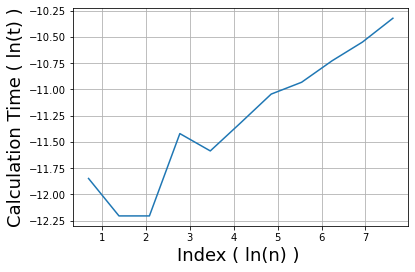

In [198]:
n1 = n1[1:]
time_mat = np.zeros(n1.size)

for i in range(n1.size):
    start_time = time.time()
    fibn = mat_fib(n1[i])
    time_mat[i] = time.time()-start_time
    
plt.plot(np.log(n1), np.log(time_mat), label = 'Matrix')
plt.grid()
plt.xlabel('Index ( ln(n) ) ', fontsize=18)
plt.ylabel('Calculation Time ( ln(t) )', fontsize=18)

Text(0, 0.5, 'Calculation Time ( ln(t) )')

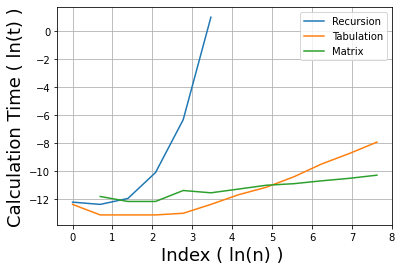

In [199]:
n1=np.array([2**i for i in (np.arange(0, 12))])

plt.plot(np.log(n1[:6]), np.log(time_rec), label = 'Recursion')
plt.plot(np.log(n1), np.log(time_tab), label = 'Tabulation')
plt.plot(np.log(n1[1:]), np.log(time_mat), label = 'Matrix')
plt.grid()
plt.legend()
plt.xlabel('Index ( ln(n) ) ', fontsize=18)
plt.ylabel('Calculation Time ( ln(t) )', fontsize=18)

c ) Discussion of complexity

The complexity of the above methods is summarised in the following table: 

|Method |Complexity O(n)|
|-----|--------|
|Recursion|  $n^2$     |
|Tabulation  |  n   |
|Matrix  |  log(n)   |

The recursive method performs a much greater number of operations than the tabulation or matrix methods for nearly every index, n. Although the tabulation method begins as the more efficient method, the number of operations becomes higher than for the matrix method, for higher index n. 


d) Summary of paper. 